# Heart Disease Prediction using Random Forest

## The data consist 303 individual data with 13 features and 1 label. Features are as follows 


1. age : Tuổi của từng bệnh nhân
2. sex : Giới tính (1 = nam; 0 = nữ)
3. cp : Chest pain type - kiểu đau ngực, gồm có 4 kiểu khác nhau theo trải nghiệm của từng bệnh nhân (0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic)
4. trestbps : Resting blood pressure - huyết áp khi nghỉ ngơi (đv : mmHg)
5. chol : Serum cholestorol - cholesterol trong huyết thanh (đv : mg/dl)
6. fbs : Fasting blood sugar - đường huyết lúc đói, so sánh giá trị đường huyết với giá trị 120mg/dl (fbs > 120 : 1 (true); fbs <= 120 : 0 (false))
7. restecg : Resting electrocardiographic - điện tim tâm đồ, kết quả điện tâm đồ gồm 3 giá trị (0 = bình thường; 1 = có sóng ST - T bất thường; 2 = phình tâm thất trái)
8. thalach : Maximum heart rate - nhịp tim tối đa đạt được
9. exang : Exercise induced angina, có hay không hiện tượng đau thắt ngực khi có hoạt động tập luyện. (1 = yes; 0 = no) 
10. oldpeak : ST depression induced by exercise relative to rest - sự chênh xuống của sóng điện tâm đồ ST do tập thể dục liên quan đến nghỉ ngơi.
11. slope : Peak exercise ST segment , độ dốc đoạn sóng ST điện tâm đồ khi tập bài tập cơ tay (1 = upsloping; 2 = flat; 3 = downsloping)
12. ca : Số lượng các mạch chính (0-3) được tô màu bằng phương pháp soi huỳnh quang.
13. thal: 0 = lỗi (trong tập dữ liệu gốc 0 ánh xạ đến NaN); 1 = bình thường; 2 = bệnh không thể khắc phục; 3 = bệnh có thể khắc phục được)
14. target: Chẩn đoán bệnh tim: Hiển thị cá nhân có bị bệnh tim hay không với 3 chỉ số (0 = không; 1 = có).

#### Imports

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Read csv file

In [5]:
data1= pd.read_csv("C:/Users/maith/Desktop/KHDL/heart.csv")

In [6]:
print("Head Values:")
data1.head()

Head Values:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
print("Tail Values:")
data1.tail()

Tail Values:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Print information of the data

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##### The above table shows that there are no null values in the dataset, so nulls do not have to be removed/infilled.

#### Check and drop duplicates

In [9]:
data1.duplicated().any()

True

In [10]:
data2 = data1.drop_duplicates(keep='first')

#### Compare after drop duplicates

In [11]:
data1.shape, data2.shape

((1025, 14), (302, 14))

#### Print data characteristics, usings pandas built-in describe()

In [12]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Get an overview distribution of each column

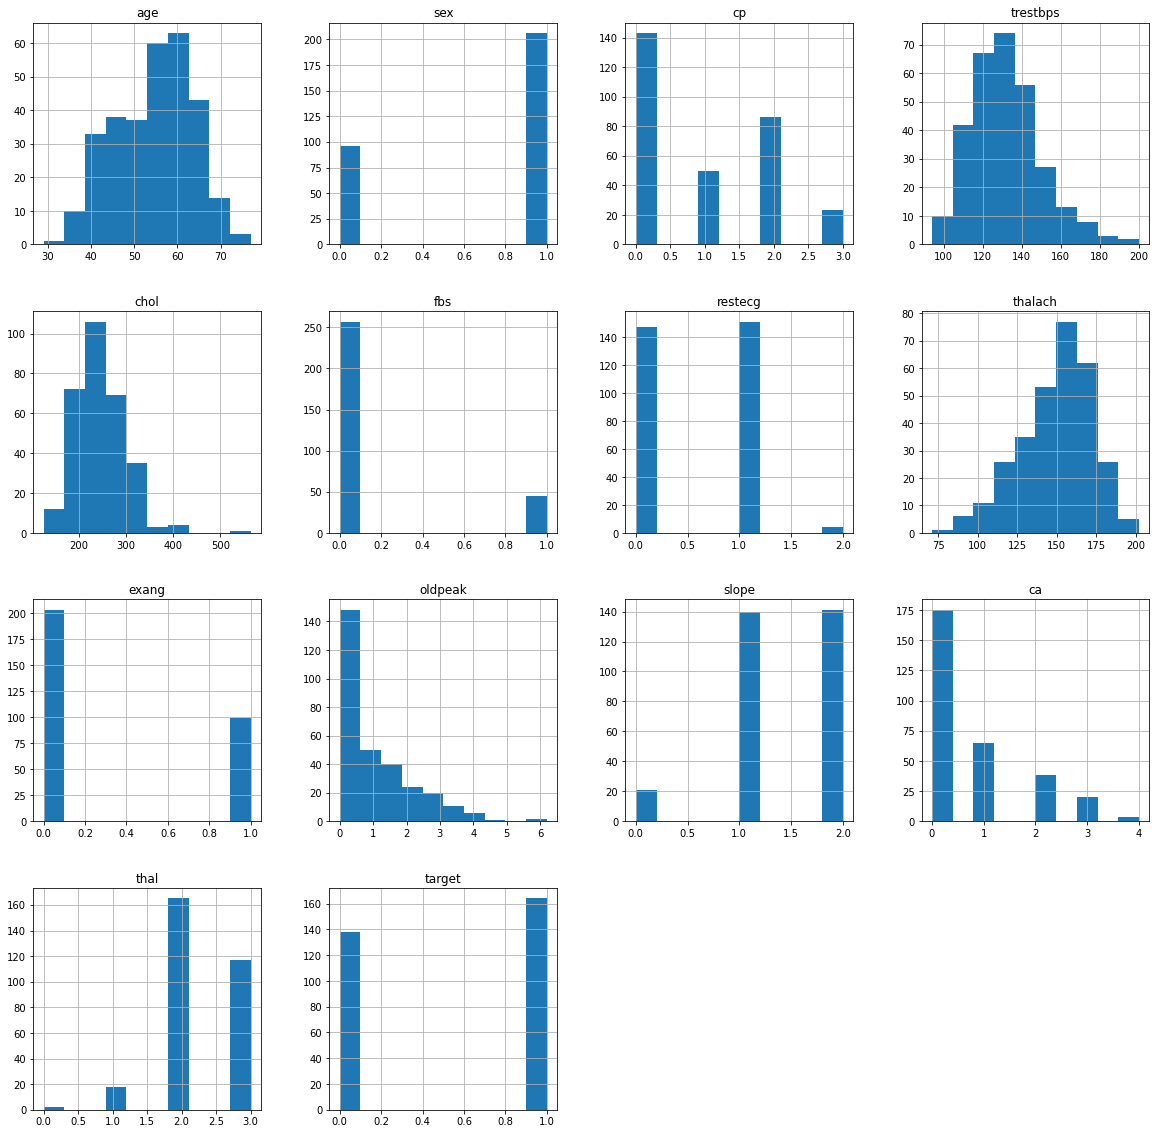

In [13]:
data2.hist(figsize=(20, 20))
plt.show()

#### Make a correlation matrix

##### I want to search for correlations between variables and especially with the target variable. To do so I will use a heatmap and correlation matrix.

<AxesSubplot:>

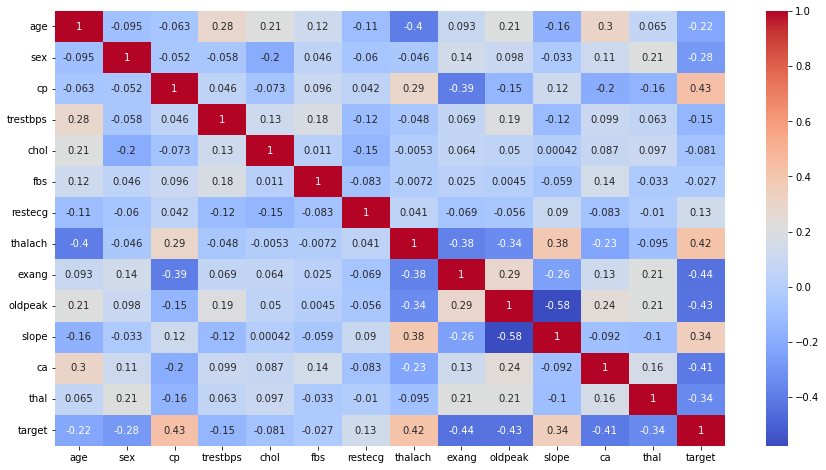

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(data2.corr(), annot=True,cmap='coolwarm')

##### In the correlation matrix, I see that there may be correlations bewteen the target variable and the sex, cp, thalach, oldpeak, exang, slope, ca and thal variables.

### Exploratory Data Analysis

#### Analysing the target variable:

In [15]:
y = data2["target"]
target_temp = data2['target'].value_counts()
print(target_temp)

1    164
0    138
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

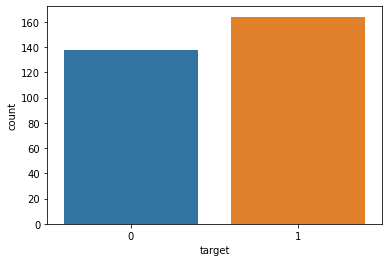

In [16]:
sns.countplot(y)

In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.13


#### We'll analyse 'sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca' and 'thal' features

#### Analysing the 'Sex' feature

In [18]:
data2["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

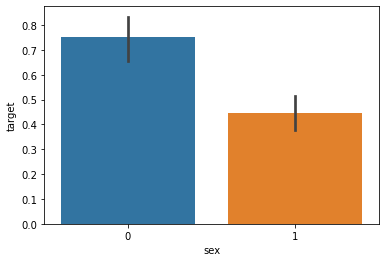

In [19]:
sns.barplot(data2["sex"],y)

#### Analysing the 'Chest Pain Type' feature

In [20]:
data2["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

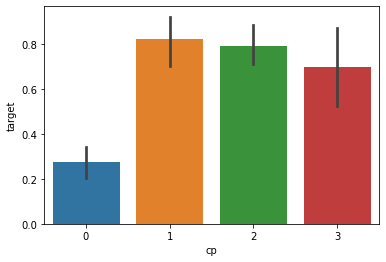

In [21]:
sns.barplot(data2["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

#### Analysing the FBS feature

In [22]:
data2["fbs"].describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:
data2["fbs"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

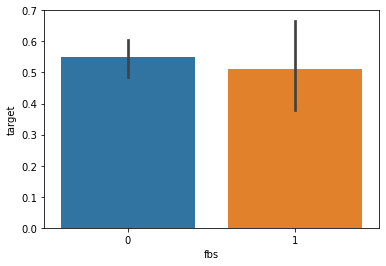

In [24]:
sns.barplot(data2["fbs"],y)

##### Nothing extraordinary here

#### Analysing the restecg feature

In [25]:
data2["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

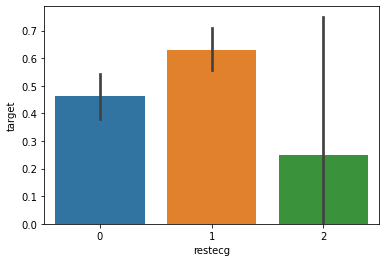

In [26]:
sns.barplot(data2["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#### Analysing the 'exang' feature

In [27]:
data2["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

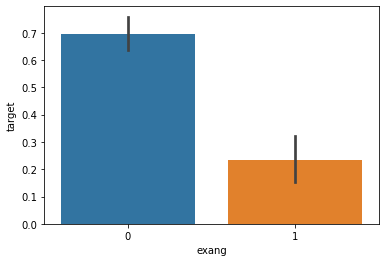

In [28]:
sns.barplot(data2["exang"],y)

#### Analysing the Slope feature

In [29]:
data2["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

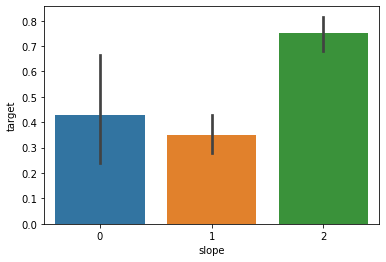

In [30]:
sns.barplot(data2["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

#### Analysing the 'ca' feature

In [31]:
data2["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='target'>

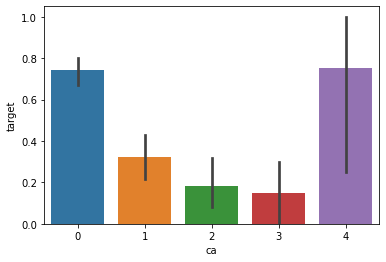

In [32]:
sns.barplot(data2["ca"],y)

##### ca=4 has astonishingly large number of heart patients

#### Analysing the 'thal' feature

In [33]:
data2["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

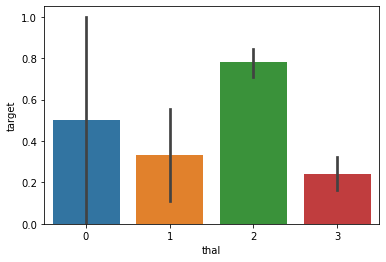

In [34]:
sns.barplot(data2["thal"],y)

### Checking & Removing Outliers

<AxesSubplot:>

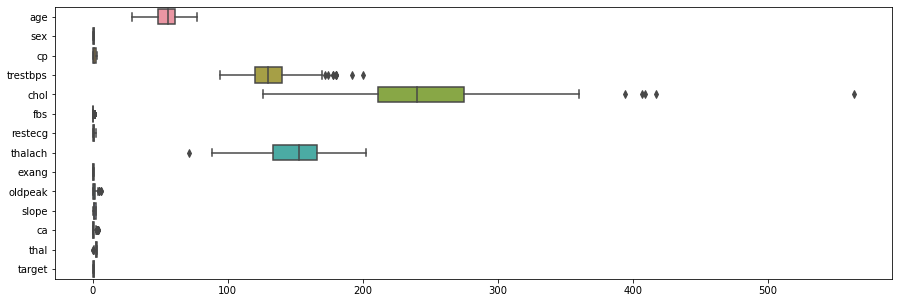

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [36]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='trestbps'>

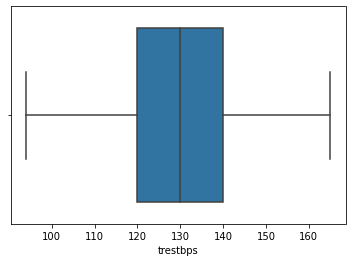

In [37]:
q1 = data2.trestbps.quantile(0.25)
q3 = data2.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
data2[data2["trestbps"] > upper_limit]
data2=data2[data2["trestbps"] < upper_limit]
sns.boxplot(data2["trestbps"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18ce8031730>,
 'caps': [<matplotlib.lines.Line2D at 0x18ce8031580>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ce80310d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18ce803ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18ce803feb0>],
 'means': []}

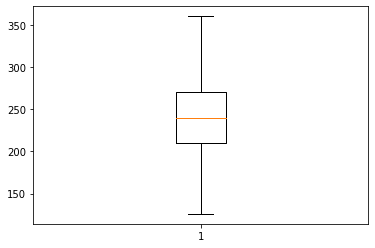

In [38]:
q1 = data2.chol.quantile(0.25)
q3 = data2.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=data2[data2["chol"]>upper_limit]
data2=data2[data2["chol"]<upper_limit]
plt.boxplot(data2["chol"])

In [39]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,54.045775,0.700704,0.961268,129.404930,242.052817,0.137324,0.538732,149.394366,0.316901,0.999296,1.419014,0.718310,2.295775,0.552817
std,9.130078,0.458758,1.020244,14.769421,44.811904,0.344797,0.520172,23.293323,0.466090,1.124636,0.609516,1.007857,0.609567,0.498080
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='thalach'>

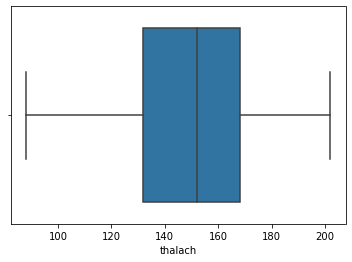

In [40]:
q1 = data2.thalach.quantile(0.25)
q3 = data2.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
data2[data2["thalach"] < lower_limit]
data2=data2[data2["thalach"] > lower_limit]
sns.boxplot(data2["thalach"])

<AxesSubplot:>

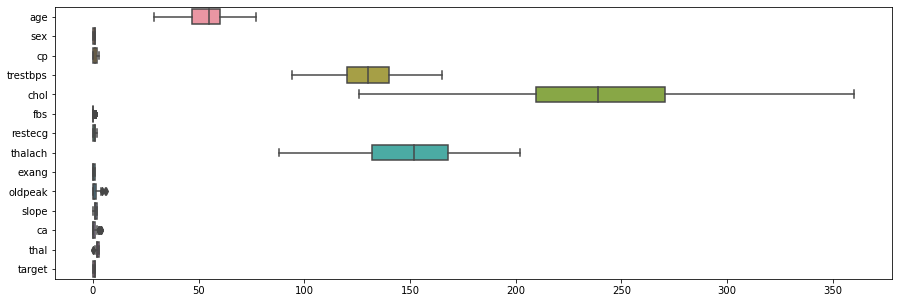

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [42]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.000000,0.699647,0.964664,129.438163,242.070671,0.137809,0.537102,149.671378,0.318021,0.999293,1.420495,0.720848,2.296820,0.554770
std,9.113547,0.459224,1.020441,14.784944,44.890275,0.345310,0.520367,22.861163,0.466533,1.126628,0.610084,1.008733,0.610392,0.497872
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
data2.shape

(283, 14)

<AxesSubplot:>

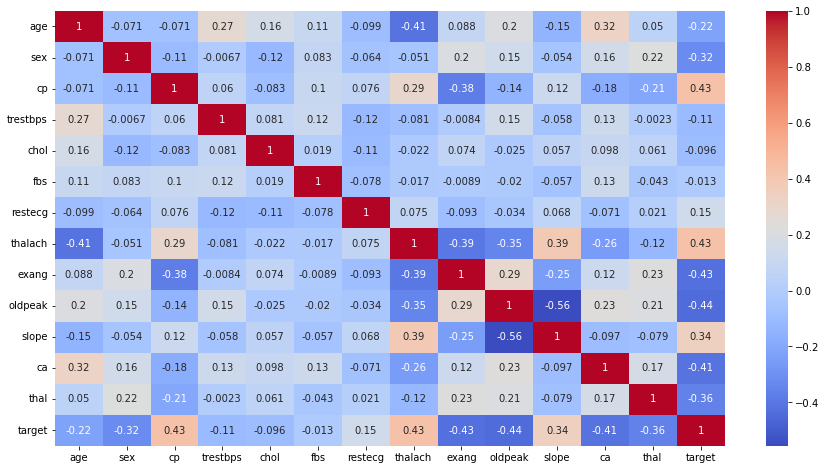

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(data2.corr(),annot=True,cmap='coolwarm')

### Data Splitting & Standardization

In [45]:
x = data2.drop('target',axis=1)
y = data2['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [47]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[ 0.33870449,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -2.08571429],
        [-1.07883651,  0.65603334,  1.054665  , ...,  0.94997577,
         -0.67590279, -0.47142857],
        [-0.75171167,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -0.47142857],
        ...,
        [ 0.33870449,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709,  1.14285714],
        [ 0.77487095,  0.65603334, -0.96528661, ..., -0.66426877,
          0.30960709, -0.47142857],
        [-0.20650359,  0.65603334,  1.054665  , ...,  0.94997577,
          3.26613673, -0.47142857]]),
 array([[ 0.01157964,  0.65603334, -0.96528661, -0.49543023,  0.94573559,
         -0.40613847, -1.03635106, -1.48573827,  1.47753125,  2.07856377,
         -0.66426877,  1.29511697, -0.47142857],
        [-1.40596136,  0.65603334,  1.054665  ,  0.05242167, -0.63278626,
         -0.40613847, -1.03635106,  0.77714355, -0.67680464,  0.9664973 ,
         -0.66426877, -0.675

### Logistic Regression

In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],
             columns=['Actual','Predicted']).head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  85.96 %
Train Accuracy score :  84.07 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.88      0.88      0.88        32

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



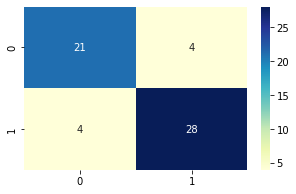

In [50]:
print(" Test Accuracy score : ",round(lr.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(lr.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
print(classification_report(y_test,lr_pred))

In [51]:
auc = roc_auc_score(y_test,lr_pred)
auc

0.8574999999999999

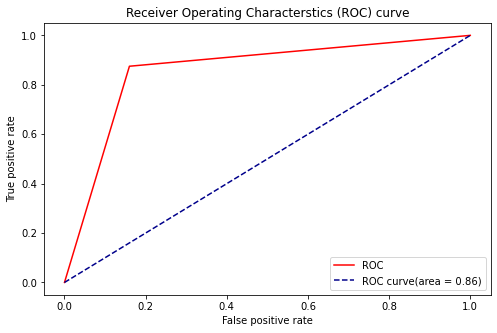

In [52]:
fpr, tpr, thresholds = roc_curve(y_test,lr_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

### Random Forest

In [63]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [64]:
rfc_pred = rfc.predict(x_test)
pd.DataFrame(np.c_[y_test,rfc_pred],columns=['Actual','Predicted']).head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  94.74 %
Train Accuracy score :  90.71 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.97      0.94      0.95        32

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



<AxesSubplot:>

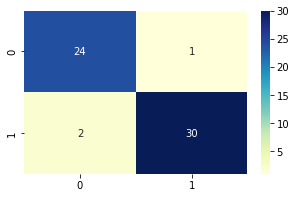

In [65]:
print(" Test Accuracy score : ",round(rfc.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc.score(x_train,y_train)*100,2),"%")
clf_con = confusion_matrix(y_test,rfc_pred)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,rfc_pred))
plt.figure(figsize=(5,3))
sns.heatmap(clf_con, annot=True,cmap="YlGnBu",fmt='g')

In [66]:
auc = roc_auc_score(y_test,rfc_pred)
auc

0.94875

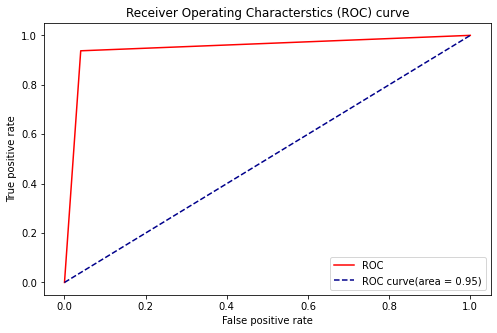

In [67]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

### Model Comparison

In [68]:
data = { 'Models' : ['Logistic Regression','Random Forest'],
         'Test Accuracy' : [round(lr.score(x_test,y_test)*100,2), round(rfc.score(x_test,y_test)*100,2)],
         'Train Accuracy': [round(lr.score(x_train,y_train)*100,2),round(rfc.score(x_train,y_train)*100,2)],
       }

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy',ascending=False)

,Models,Test Accuracy,Train Accuracy
1,Random Forest,94.74,90.71
0,Logistic Regression,85.96,84.07


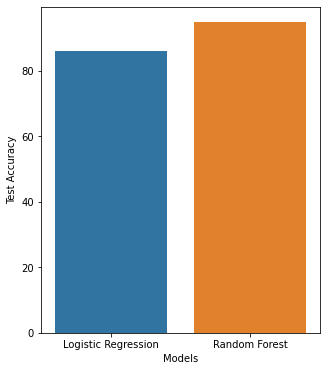

In [69]:
plt.figure(figsize = (5,6))
sns.barplot(x='Models', y='Test Accuracy',data=df)
plt.show()

### Data Testing

In [70]:
data2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [71]:
sample1 = [50,0,1,120,244,0,1,162,0,1.1,2,0,2]
if rfc.predict([sample1]) == 0:
    print('[SAFE] HEART DISEASE NOT DETECTED')
else:
    print(' [WARNING] HEART DISEASE DETECTED')

 [WARNING] HEART DISEASE DETECTED


In [72]:
sample2 = [30,1,1,120,274,0,1,134,0,3.2,2,0,3]
if lr.predict([sample2]) == 0:
    print('[SAFE] HEART DISEASE NOT DETECTED')
else:
    print(' [WARNING] HEART DISEASE DETECTED')

[SAFE] HEART DISEASE NOT DETECTED
